<a href="https://colab.research.google.com/github/CodingKroger/422-Practical-Machine-Learning/blob/master/Assignment_3_Evaluating_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [4]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

# EDA

In [5]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [6]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [7]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus  ...     ptratio       lstat          mv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.528854
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.182176
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


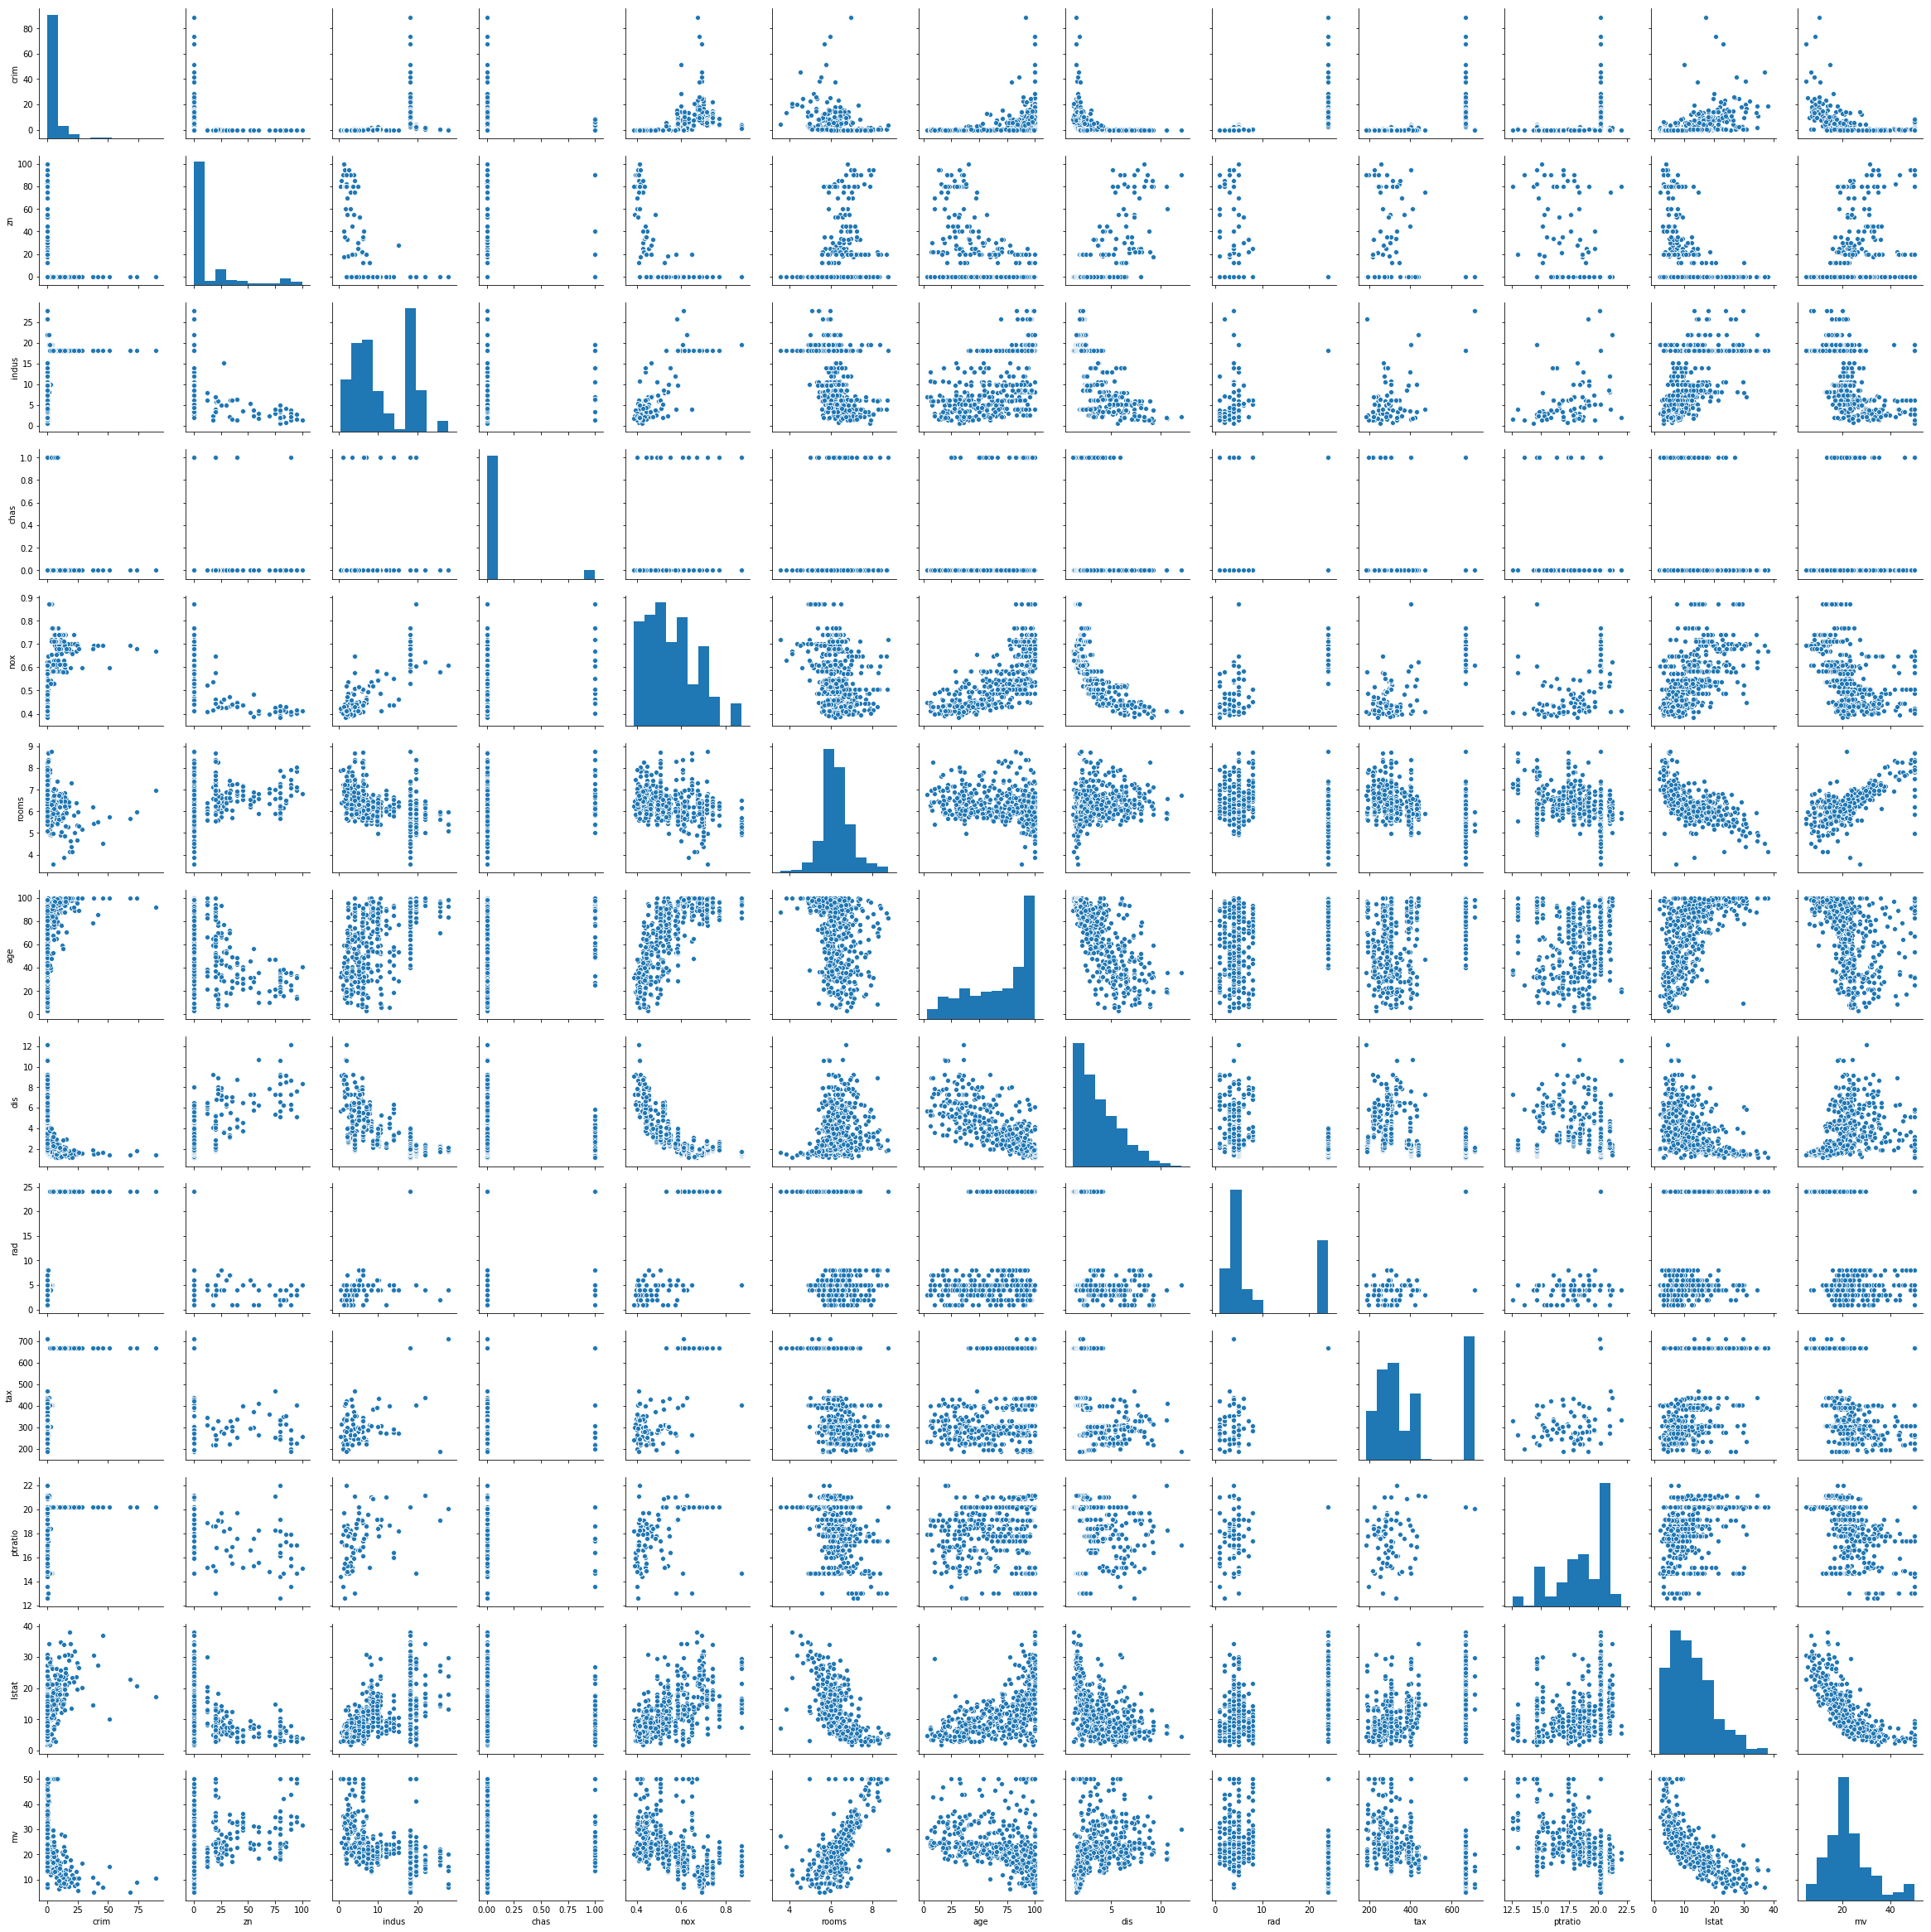

In [8]:
import seaborn as sns
sns.pairplot(boston, kind="scatter")

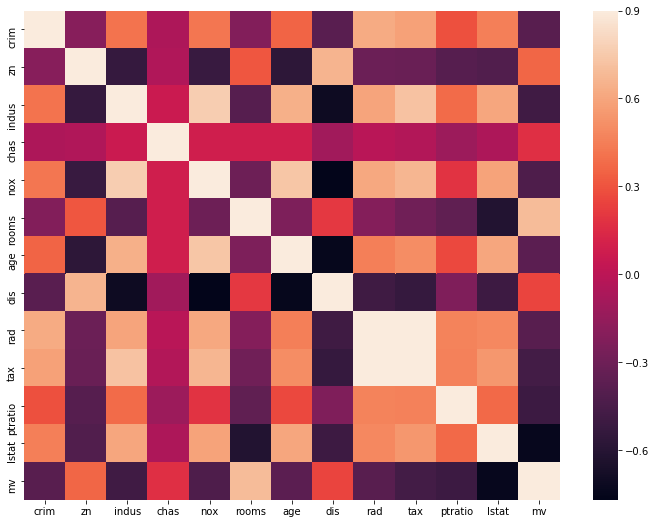

In [13]:
# Create a correlation matrix
import matplotlib.pyplot as plt
corrmat = boston.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

In [0]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T
y_value = boston['mv']

In [38]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 12)


In [39]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [40]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 1.26530632e+01]
[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 7.13400164e+00]


In [0]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [42]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 12)


# Modeling

In [0]:
# linear regression
from sklearn.linear_model import LinearRegression
X = model_data
y = y_value
clf = LinearRegression().fit(X, y)
# clf.score(X, y) #.738

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
scores = np.array([sqrt(abs(x)) for x in scores])
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 6.05 (+/- 3.32)


In [74]:
# ridge regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
scores = np.array([sqrt(abs(x)) for x in scores])
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 5.72 (+/- 3.46)


In [77]:
# lasso regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
scores = np.array([sqrt(abs(x)) for x in scores])
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 5.64 (+/- 3.70)


In [76]:
# elastic net
from sklearn.linear_model import ElasticNet
clf = ElasticNet(random_state=0)
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
scores = np.array([sqrt(abs(x)) for x in scores])
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 6.05 (+/- 3.32)


# Conclusion

The lasso regression returned the best results using a RMSE accuracy score of 5.64 with a two score standard deviation away of 3.70 (in thousands).